In [1]:
#EDA Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data= pd.read_csv('dhpr.csv')
print(data.head())
data.describe()

   Y        D1        D2        D3        D4        D5        D6        D7  \
0  0  2.920766  1.550487  2.375639  4.159220  1.888199 -1.674395  0.132739   
1  0 -0.547838 -0.157313  0.010091  0.646597  0.018594  0.380726 -1.600301   
2  0  0.630467  0.791683  0.010091  2.732726  1.214137 -0.216422 -0.512285   
3  0 -2.089836 -1.451399  1.351136 -0.267105 -0.964494  1.745637 -0.577158   
4  0 -2.226030 -1.390616  0.524045  0.471781 -0.821569  1.187264 -1.718926   

         D8        D9  ...      D106      D107      D108      D109      D110  \
0  0.414987  1.881364  ... -1.937401  1.849177  2.459634  1.984989  2.289495   
1  1.541328 -0.617489  ...  0.877753 -0.838964 -0.223702 -0.936079 -1.158133   
2  1.186739 -0.238125  ... -0.489142  0.348633  1.125379  0.339231  0.158335   
3  0.496224 -1.557652  ...  2.506817 -2.680541 -2.462285 -2.543375 -2.326475   
4  1.507296 -1.087571  ...  3.002226 -3.053671 -2.784730 -2.948235 -2.567180   

       D111      D112      D113      D114      D11

,Y,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.624615,0.058764,0.027714,0.039750,0.060063,0.016425,-0.049960,0.016144,-0.006912,0.042984,...,-0.059792,0.057079,0.073062,0.055617,0.050961,0.049598,-0.001874,-0.022158,0.015177,0.015744
std,0.484969,0.949717,0.942353,1.046378,1.034567,0.957810,0.986474,1.013620,1.002995,0.992376,...,0.927069,0.929999,0.905981,0.937257,0.958343,0.974356,0.979887,1.003987,0.953473,1.104921
min,0.000000,-2.890165,-2.761170,-0.650220,-2.015258,-2.841825,-2.860936,-3.031217,-3.489880,-1.821557,...,-2.459931,-3.454886,-3.518571,-3.363217,-2.881947,-2.545596,-2.397082,-1.389947,-3.327557,-0.071067
25%,0.000000,-0.302995,-0.465149,-0.650220,-0.560795,-0.512544,-0.518874,-0.540088,-0.680615,-0.510278,...,-0.572313,-0.333433,-0.164401,-0.367250,-0.361957,-0.535443,-0.579557,-0.719462,-0.212713,-0.071067
50%,1.000000,0.084672,0.030917,0.010091,-0.027025,-0.045142,0.117050,-0.124900,0.037344,-0.213384,...,-0.252286,0.127964,0.202519,0.157044,0.010209,0.049624,-0.053432,-0.048977,0.133381,-0.071067
75%,1.000000,0.487642,0.526983,0.282384,0.422833,0.704245,0.403992,0.531245,0.798118,0.207215,...,0.272052,0.557264,0.528670,0.632755,0.510134,0.609895,0.687927,0.621507,0.133381,-0.071067
max,1.000000,3.063591,3.162212,5.840572,4.159220,2.469554,2.280744,8.430940,2.145116,2.887503,...,3.550069,2.475072,2.459634,2.723859,3.565228,3.701067,2.832287,3.973930,2.209944,14.035759


In [3]:
data.isnull().sum()

Y       0
D1      0
D2      0
D3      0
D4      0
       ..
D111    0
D112    0
D113    0
D114    0
D115    0
Length: 115, dtype: int64

In [5]:
data.shape

(325, 115)

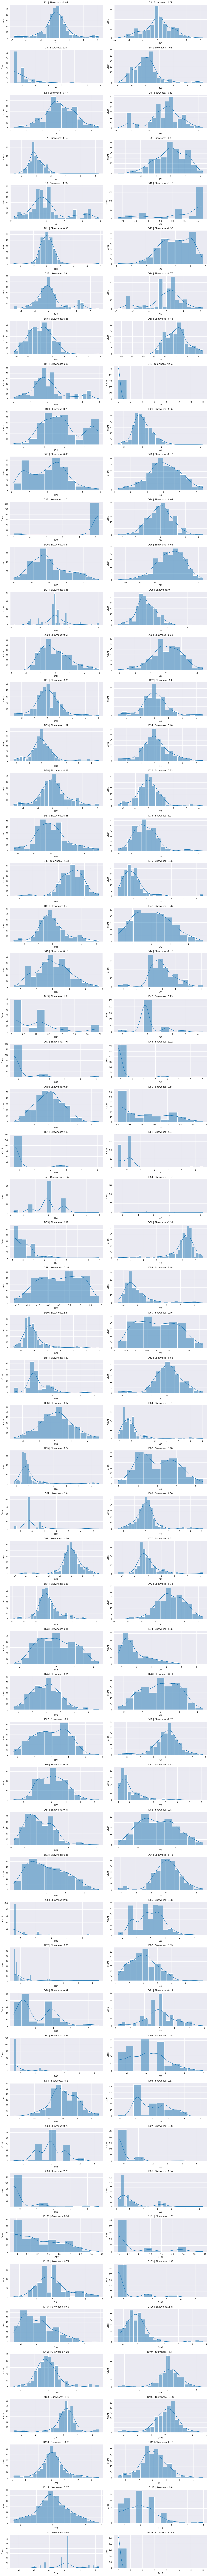

In [7]:
# Распределение признаков
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style("darkgrid")
numerical_columns = data.select_dtypes(include=["float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [11]:
#Модель Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from imblearn.over_sampling import SMOTE

# Определение целевой переменной 
X = data.drop('Y', axis=1)  # Признаки
y = data['Y']  # Целевая переменная

# Разделение выборки на обучающую и тестовую, ресемплинг
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(f"Распределение классов в обучающем наборе до ресемплинга: {Counter(y_train)}")
# Устранение дисбаланса классов
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Распределение классов в обучающем наборе до ресемплинга: Counter({1: 166, 0: 94})


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Лучшие параметры: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
Лучшая точность (CV): 0.9580732700135683
Accuracy на тестовых данных: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.92      0.95      0.93        37

    accuracy                           0.92        65
   macro avg       0.92      0.92      0.92        65
weighted avg       0.92      0.92      0.92        65

Матрица истинности:
 [[25  3]
 [ 2 35]]


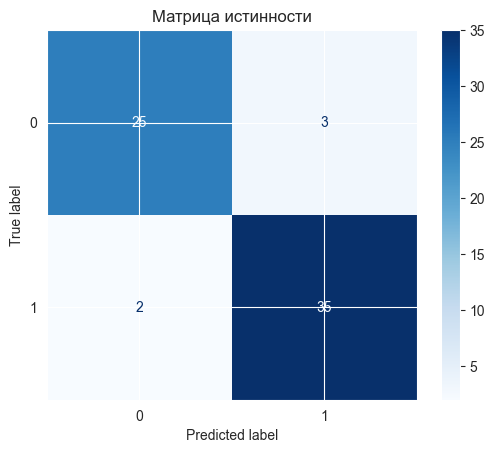

Кросс-валидационные оценки: [0.73846154 0.93846154 0.98461538 0.90769231 0.92307692]
Средняя кросс-валидационная точность: 0.90 ± 0.08


In [17]:
# Подбор гиперпараметров для случайного леса GridSearch
param_grid = {
    'n_estimators': [20, 30, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)
# Применение лучшей модели на тестовых данных
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Оценка модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица истинности')
plt.show()

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_clf, X, y, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

ROC-AUC: 0.9720077220077221


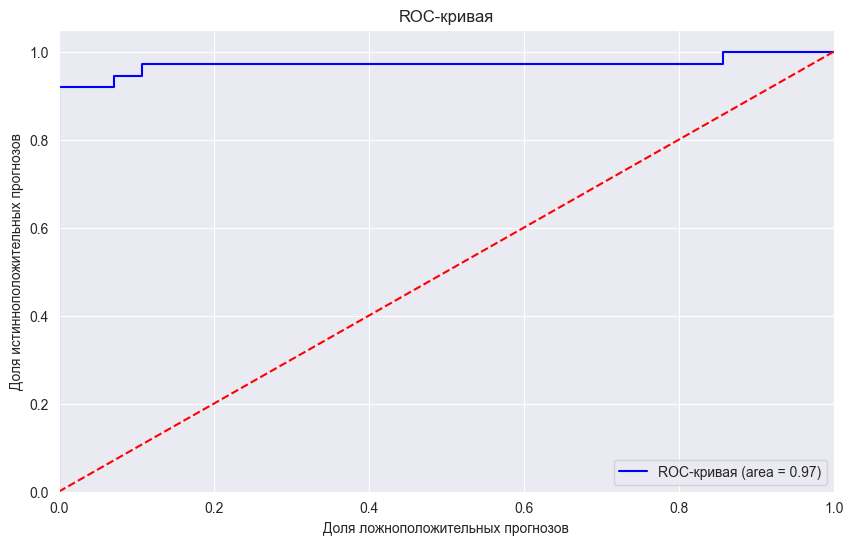

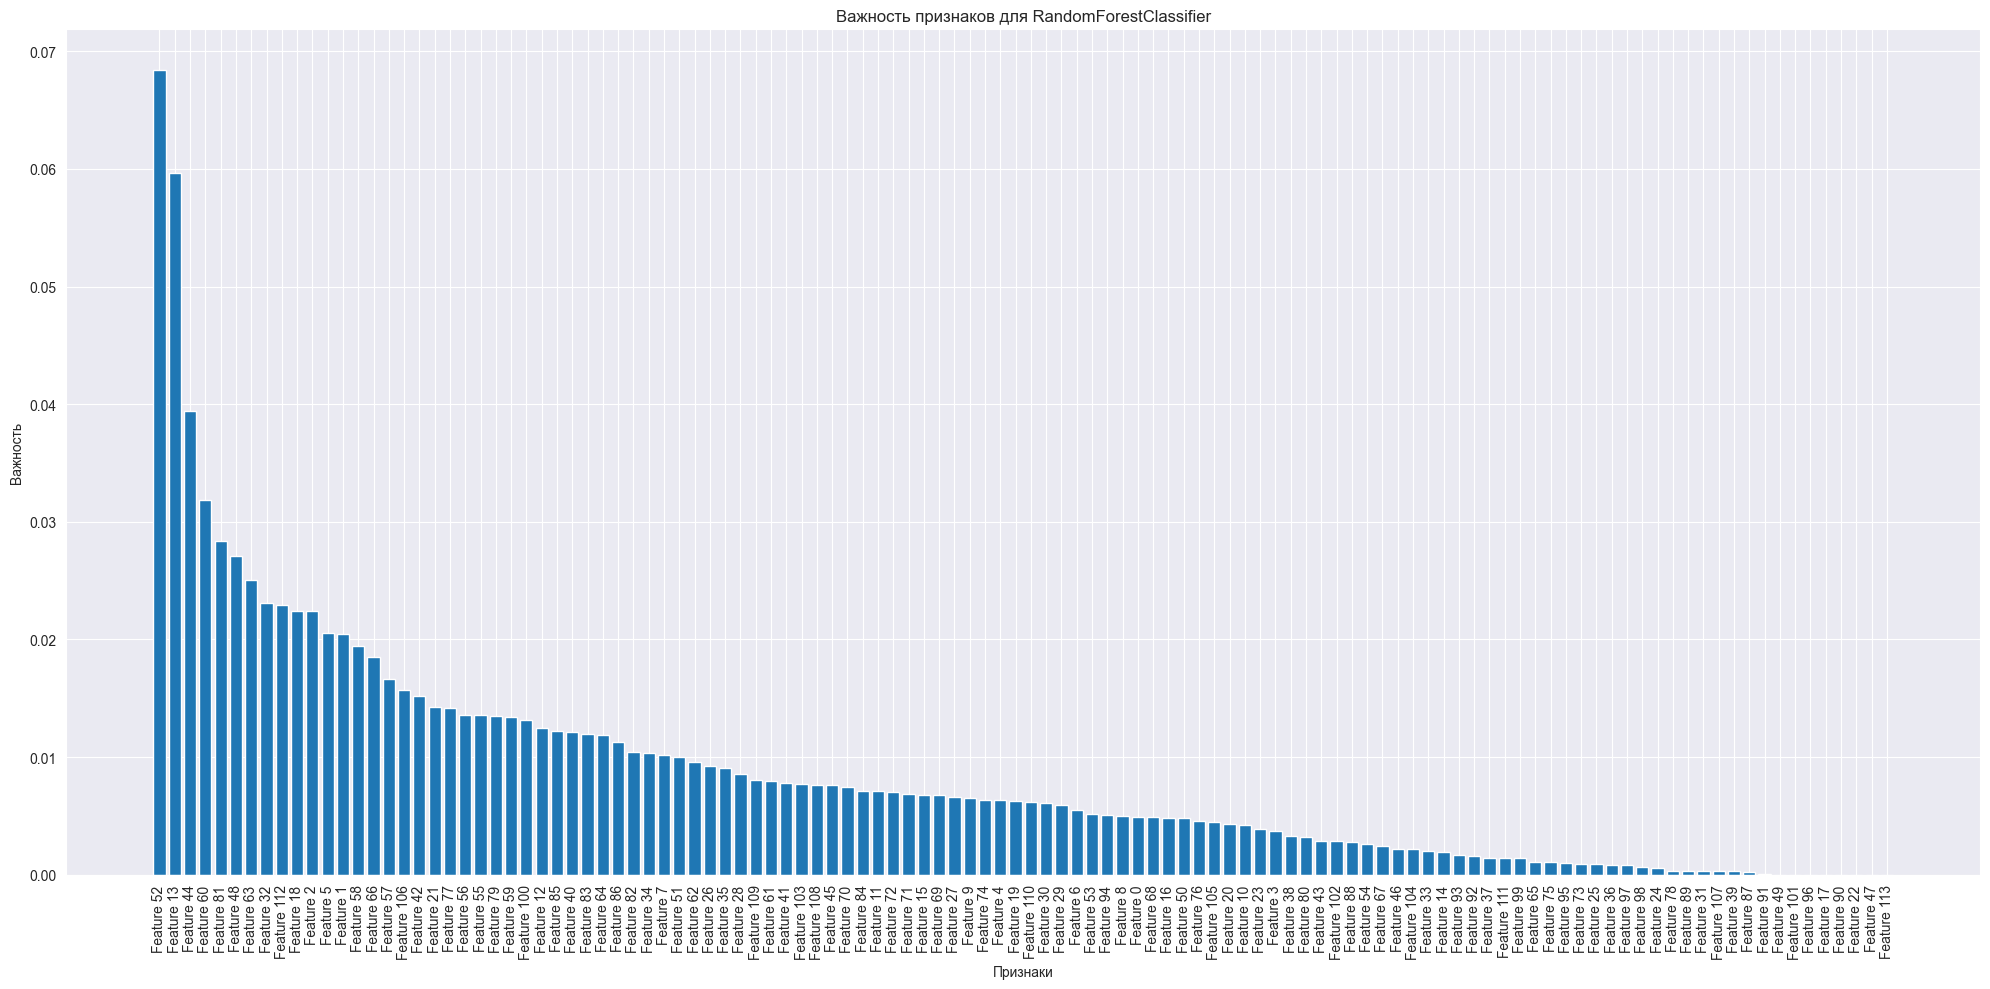

In [19]:
# Вычисление показателя ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных прогнозов')
plt.ylabel('Доля истинноположительных прогнозов')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

feature_importances = best_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(20, 10))
plt.title("Важность признаков для RandomForestClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

In [2]:
# AdaBoost Classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from imblearn.over_sampling import SMOTE

#Загрузка датасета
data= pd.read_csv('dhpr.csv')

# Определение целевой переменной 
X = data.drop('Y', axis=1)  # Признаки
y = data['Y']  # Целевая переменная

# Разделение выборки на обучающую и тестовую, устранение дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 150}
Лучшая точность (CV): 0.9337856173677069
Accuracy на тестовых данных: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.95      0.97      0.96        37

    accuracy                           0.95        65
   macro avg       0.96      0.95      0.95        65
weighted avg       0.95      0.95      0.95        65

Матрица истинности:
 [[26  2]
 [ 1 36]]


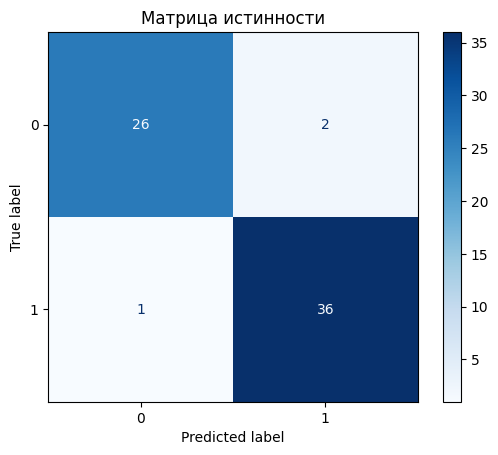

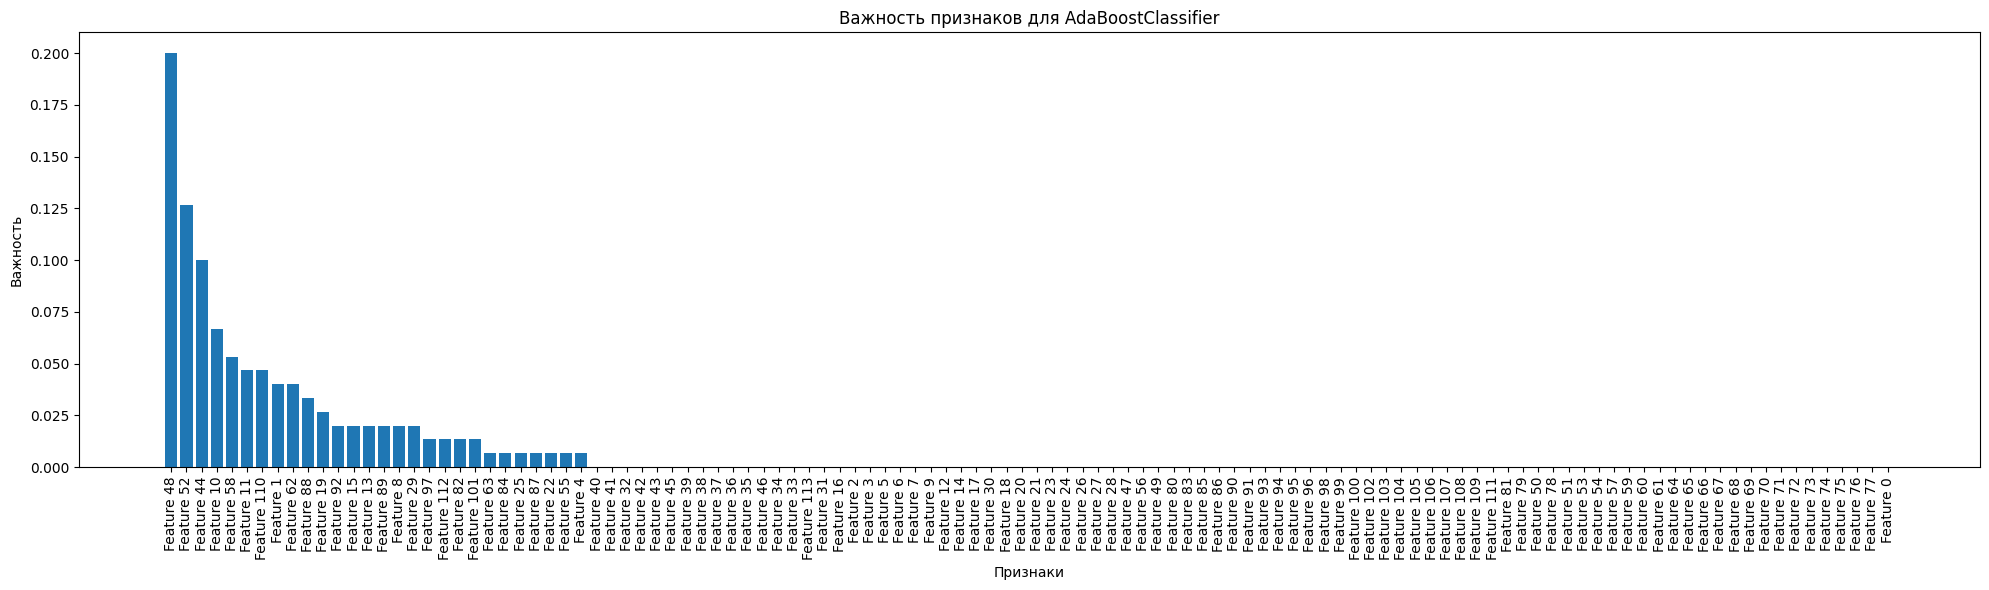

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Кросс-валидационные оценки: [0.8        0.93846154 0.95384615 0.93846154 0.89230769]
Средняя кросс-валидационная точность: 0.90 ± 0.06


In [4]:
# Построение модели
base_estimator = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator=base_estimator)

# Определение параметров для GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

# Инициализация AdaBoost Classifier
abc = AdaBoostClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=abc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_abc = grid_search.best_estimator_
y_pred = best_abc.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица истинности')
plt.show()
# Визуализация важности признаков
feature_importances = best_abc.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(20, 6))
plt.title("Важность признаков для AdaBoostClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()
# 6. Обучение модели
grid_search.fit(X_train, y_train)

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_abc, X, y, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


ROC-AUC: 0.9845559845559846


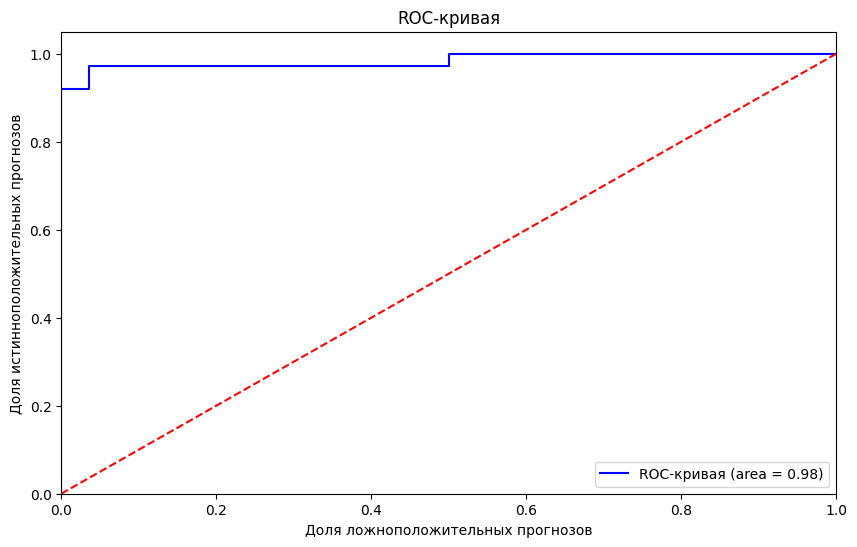

In [6]:
# Вычисление показателя ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных прогнозов')
plt.ylabel('Доля истинноположительных прогнозов')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Лучшая точность (CV): 0.9670284938941656
Accuracy на тестовых данных: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.90      0.97      0.94        37

    accuracy                           0.92        65
   macro avg       0.93      0.92      0.92        65
weighted avg       0.93      0.92      0.92        65

Матрица истинности:
 [[24  4]
 [ 1 36]]


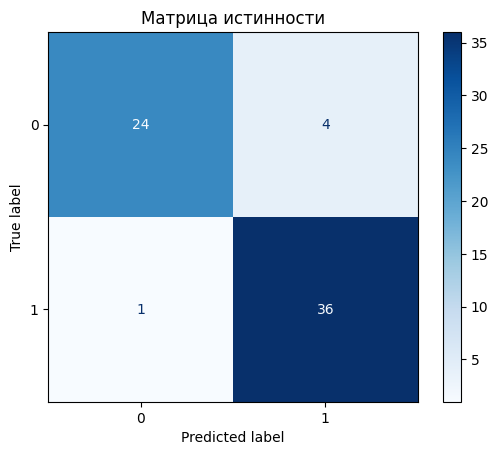

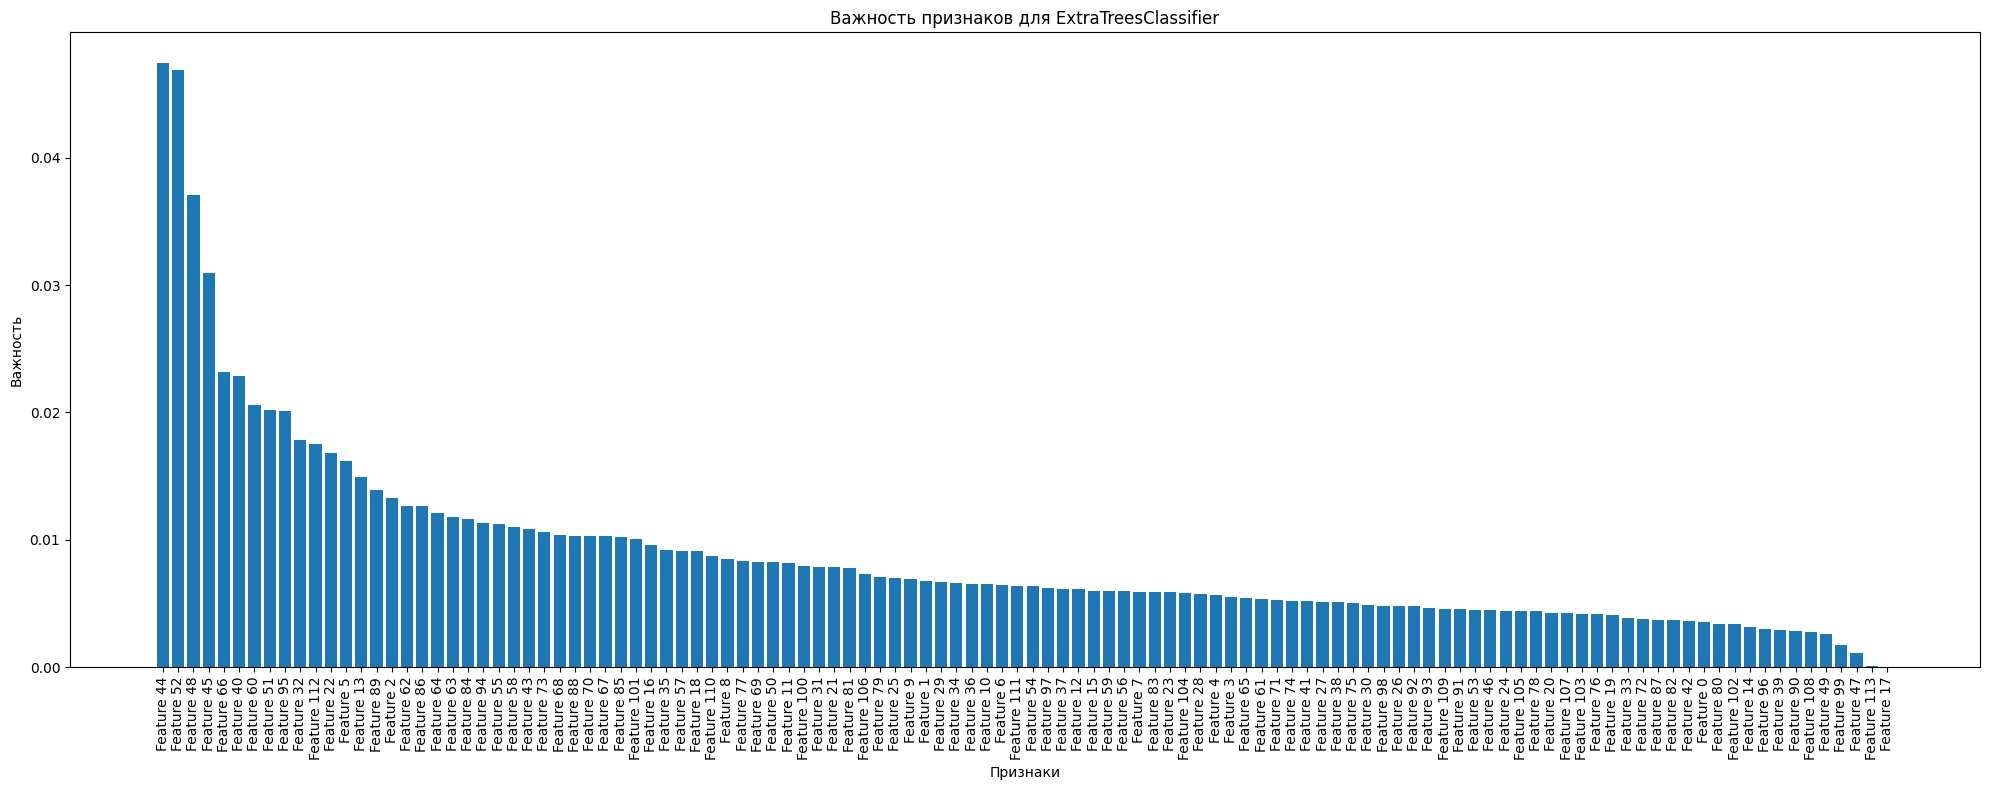

Кросс-валидационные оценки: [0.75384615 0.96923077 0.98461538 0.93846154 0.93846154]
Средняя кросс-валидационная точность: 0.92 ± 0.08
ROC-AUC: 0.9681467181467182


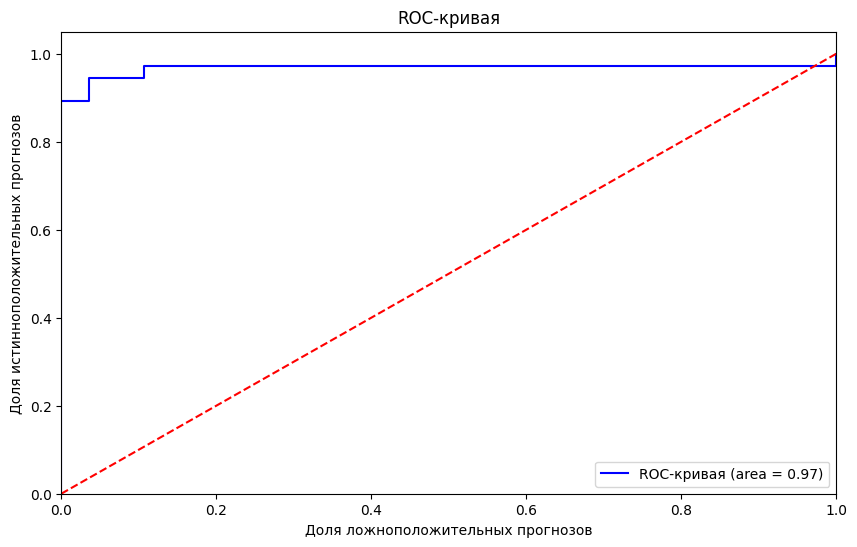

In [8]:
# ExtraTreesClassifier 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from imblearn.over_sampling import SMOTE

#Загрузка датасета
data= pd.read_csv('dhpr.csv')

# Определение целевой переменной 
X = data.drop('Y', axis=1)  # Признаки
y = data['Y']  # Целевая переменная

# Разделение выборки на обучающую и тестовую, устранение дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Создание и обучение классификатора Extra Trees с использованием GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Инициализация ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица истинности')
plt.show()

# Визуализация важности признаков
feature_importances = best_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Важность признаков для ExtraTreesClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_clf, X, y, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

# Вычисление показателя ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных прогнозов')
plt.ylabel('Доля истинноположительных прогнозов')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 166, number of negative: 166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8354
[LightGBM] [Info] Number of data points in the train set: 332, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

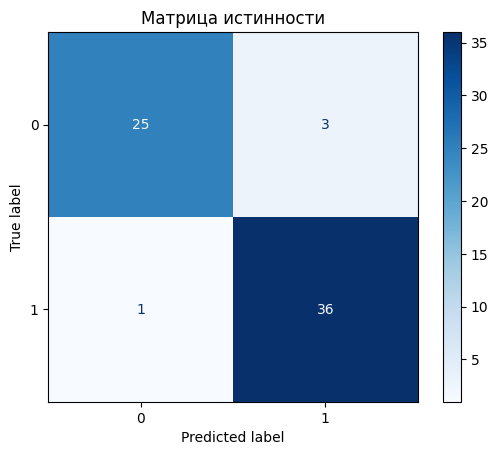

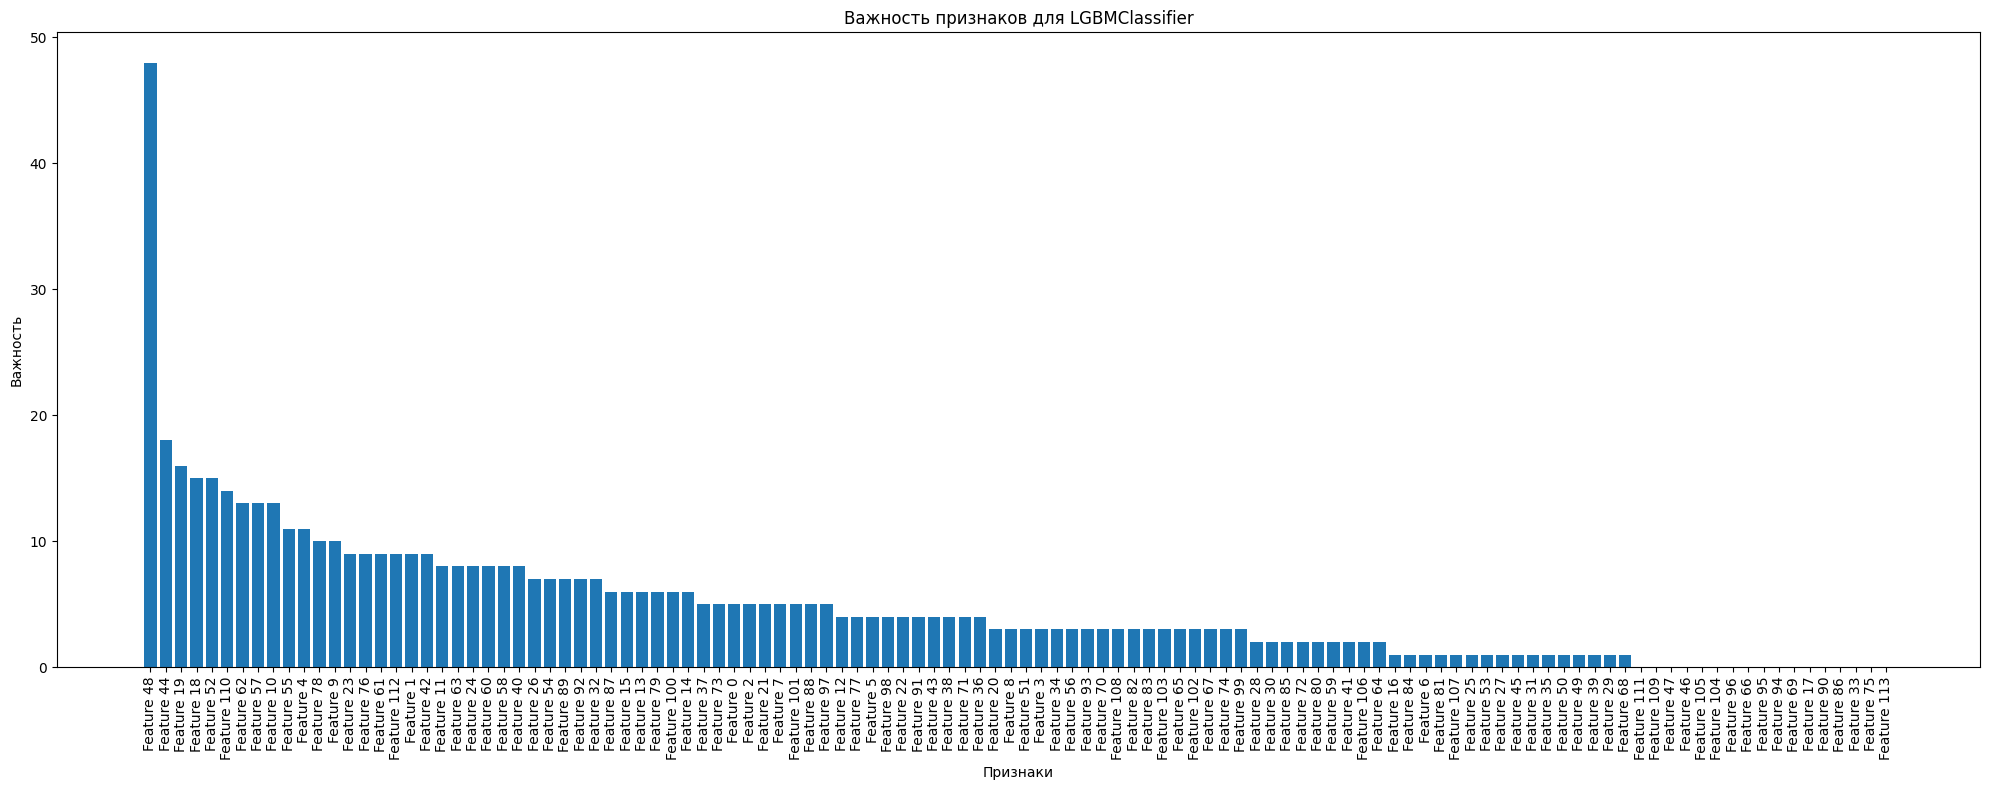

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 163, number of negative: 97
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6159
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626923 -> initscore=0.519039
[LightGBM] [Info] Start training from score 0.519039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

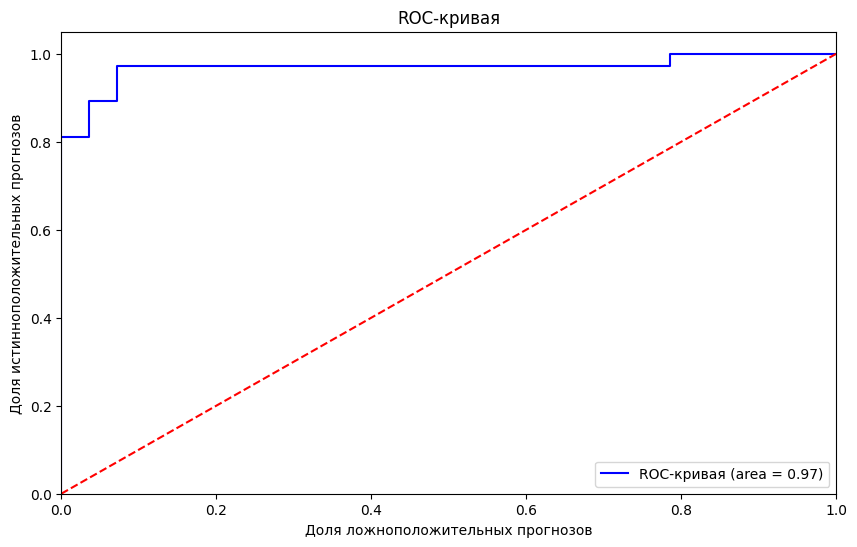

In [14]:
# LGBM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

#Загрузка датасета
data= pd.read_csv('dhpr.csv')

# Определение целевой переменной 
X = data.drop('Y', axis=1)  # Признаки
y = data['Y']  # Целевая переменная

# Разделение выборки на обучающую и тестовую, устранение дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Создание и обучение классификатора с использованием GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [20, 40, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Инициализация LGBM
lgbm = lgb.LGBMClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица истинности')
plt.show()

# Визуализация важности признаков
feature_importances = best_lgbm.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Важность признаков для LGBMClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_lgbm, X, y, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

# Вычисление показателя ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных прогнозов')
plt.ylabel('Доля истинноположительных прогнозов')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Лучшая точность (CV): 0.9579375848032565
Accuracy на тестовых данных: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.92      0.92      0.92        37

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.91      0.91      0.91        65

Матрица истинности:
 [[25  3]
 [ 3 34]]


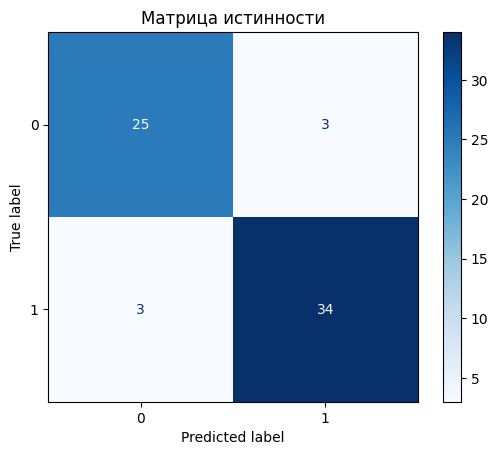

Кросс-валидационные оценки: [0.75384615 0.96923077 0.95384615 0.95384615 0.93846154]
Средняя кросс-валидационная точность: 0.91 ± 0.08


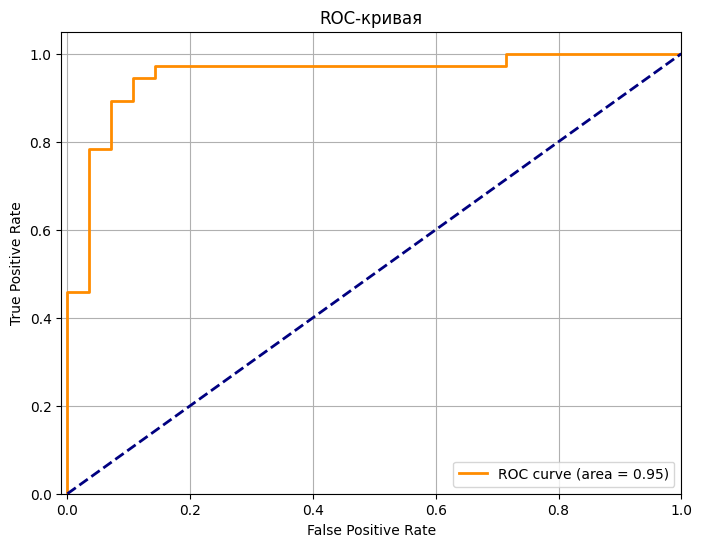

In [16]:
# SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE

#Загрузка датасета
data= pd.read_csv('dhpr.csv')

# Определение целевой переменной 
X = data.drop('Y', axis=1)  # Признаки
y = data['Y']  # Целевая переменная

# Разделение выборки на обучающую и тестовую, устранение дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Создание и обучение классификатора с использованием GridSearchCV для подбора гиперпараметров
param_grid  = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, num=7)),
    'kernel': ['linear', 'rbf', 'poly']
}

# Инициализация SVM
svm = SVC(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица истинности')
plt.show()

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


# Вычисление показателя ROC-AUC
y_scores = best_svm.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
